In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Preparing the dataset

In [3]:
filepath1 = "/Users/e/DATA3402.Fall.2024/Labs/Kaggle.Data.Project/widsdatathon2024-challenge1/training.csv"
filepath2 = "/Users/e/DATA3402.Fall.2024/Labs/Kaggle.Data.Project/widsdatathon2024-challenge1/test.csv"

In [4]:
df_train = pd.read_csv(filepath1)
df_test = pd.read_csv(filepath2)

In [5]:
df_train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [6]:
df_train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [7]:
df_train_num = df_train.select_dtypes(include = ['float', 'int']).drop(columns = ['patient_id', 'patient_zip3', 'bmi'])

In [8]:
df_train_num.columns

Index(['patient_age', 'population', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced',
       'never_married', 'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 'home_value', 'rent_median',
       'rent_burden', 'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_co

In [9]:
df_train_num = df_train_num.dropna()

In [10]:
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12873 entries, 0 to 12905
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_age                  12873 non-null  int64  
 1   population                   12873 non-null  float64
 2   density                      12873 non-null  float64
 3   age_median                   12873 non-null  float64
 4   age_under_10                 12873 non-null  float64
 5   age_10_to_19                 12873 non-null  float64
 6   age_20s                      12873 non-null  float64
 7   age_30s                      12873 non-null  float64
 8   age_40s                      12873 non-null  float64
 9   age_50s                      12873 non-null  float64
 10  age_60s                      12873 non-null  float64
 11  age_70s                      12873 non-null  float64
 12  age_over_80                  12873 non-null  float64
 13  male                 

## Logistic Regression

In [12]:
X = df_train_num.drop(['DiagPeriodL90D'], axis = 1)
y = df_train_num['DiagPeriodL90D']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
log_reg = LogisticRegression(max_iter=1000, solver='sag')

# Train the classifier
log_reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

In [15]:
from sklearn.model_selection import cross_val_score
#Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-validation scores: [0.6223301  0.62378641 0.62184466 0.62117533 0.62068966]
Mean cross-validation score: 0.6219652296100001


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = log_reg.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.6283495145631068
Precision: 0.6299646087298466
Recall: 0.9901112484548825
F1 Score: 0.7700072098053352
Confusion Matrix:
 [[  16  941]
 [  16 1602]]


## Naive Bayes

In [26]:
from sklearn.preprocessing import RobustScaler

In [28]:
# Scaling the data to better fit the model
scaler = RobustScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.naive_bayes import GaussianNB

In [34]:
# State the model
model = GaussianNB()

In [36]:
# Fit the model
model.fit(X_train, y_train)

GaussianNB()

In [38]:
# Setting prediction
y_pred = model.predict(X_test)

y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [40]:
# Model accuracy score
accuracy_score(y_test, y_pred)

0.5823407560849301

In [42]:
# Test set score
model.score(X_test, y_test)

0.5823407560849301

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 469 1000]
 [ 613 1780]]

True Positives(TP) =  469

True Negatives(TN) =  1780

False Positives(FP) =  1000

False Negatives(FN) =  613


## XGBoost

In [47]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
import xgboost as xgb
from xgboost import XGBClassifier

In [51]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:18:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred = model.predict(X_test)

Accuracy: 0.59
Confusion Matrix:
 [[ 423 1046]
 [ 540 1853]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.29      0.35      1469
           1       0.64      0.77      0.70      2393

    accuracy                           0.59      3862
   macro avg       0.54      0.53      0.52      3862
weighted avg       0.56      0.59      0.57      3862



NameError: name 'plt' is not defined

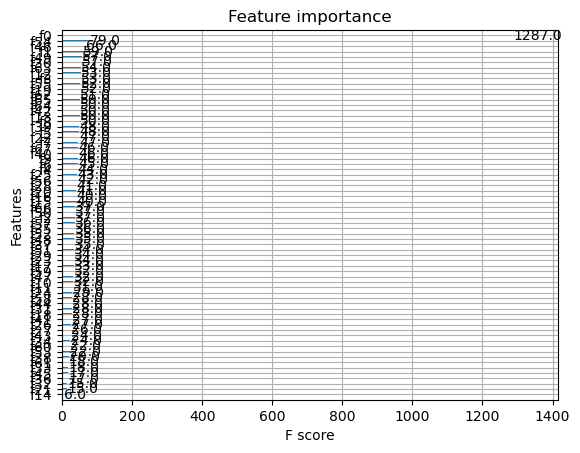

In [55]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot feature importance
xgb.plot_importance(model)
plt.show()